# ICS4U – File Input and Output in Python
## ICS4U Learning Goals
In this ICS4U Grade 12 Computer Science lesson you will be learning how to

- Read Data from a File

- Write Data to a File

<br>

## Opening a Text File for Reading
Text files can be accessed using two different methods

- Random Access -> The program can start reading at any place within th file

- Sequential Access -> The program starts reading at the start of the file only

In this course, we are only going to look at Sequential Access

One of the more frustrating aspects of FileIO is making sure Python can actually find the data file. In this course I would recommend putting the file in same directory as your program (or maybe a subdirectory). If you do that it “should” be easy for python to find the file

Suppose you had information stored in a file on your computer called “data.txt”

If the file is in the same directory as your python program, then the following code would open the text file for reading


In [ ]:
file = open("data.txt","r")

If the file is in a subfolder that is in the same directory as your python program, then the following code would open the text file for reading

In [ ]:
file = open("MyFiles/data.txt","r")

<br>

## Reading The Data
Once the file is open you can use the `readline()` function to get the data from each line of the file.  Every time that function is called, it reads the entire line of the file as String, then puts the file pointer to the next line of the file.  Basically it is acting exactly like an `input()` function that you’ve been using to get data from the keyboard.

In order to successfully read and process data from files your program needs to know how the data is formatted.

<br>

### Example 1 - Known File Size
In this example, lets assume that you know exactly how many lines are in your data file. This is easy because we can just use a counted loop that executes as many times as there are lines in the file.  In that loop you would want to call `readline()` and then store that String somewhere.  Likely a list so you can process it after the fact. 

## ICS4U Interactive Learning Activity - Grade 12 Computer Science
Let’s look at a data file that contains a list of 10 integers

- The integers are stored in the text file 1 integer per line

You need to create this file.  If you want to use the python editor below on the web, just click the + button on the right hand side of the editor and it will create a text file that you can rename whatever you want.  (If you want to try on your computer then you can just create a file using any text editor)

Enter some integers, one per line, into your file and execute the code below to see what happens

In [ ]:
#Open the file for reading
file = open("data.txt","r")

#Make an empty list to store the data
x = []

#Read the 10 lines of the file and append to the list
for i in range(0,10):
	x.append(file.readline())

#Done reading so close the file
file.close()

#Print the results of the read to the screen
print(x)

Now if you look at your output you will see that it read the values and stored them in the list, but they are stored as strings, and also have the new line character attached to them. We need to strip that new line character and convert each number to an int.

Modify your code as follows and run the program again.  Now you will notice you have a true list full of 10 integer values.

In [ ]:
#Open the file for reading
file = open("data.txt","r")

#Make an empty list to store the data
x = []

#Read the 10 lines of the file and append to the list
for i in range(0,10):
	x.append(int(file.readline().rstrip("\n")))

#Done reading so close the file
file.close()

#Print the results of the read to the screen
print(x)

<br>

### Example 2 - Unknown File Size
Sometimes you will have a file that you won’t know how much data is it when the program is written, or maybe the number of entries in the data file changes every time the program is run.  Perhaps its storing user data and users are constantly being added or deleted.  

A simple way to handle that is to read a line of the file.  And if it reads as a blank line, assume you are at the end of the file and stop reading. 

## ICS4U Interactive Learning Activity - Grade 12 Computer Science
Take the same data file you were using in the previous activity and modify your code to as follows.  

In [ ]:
#Open the file for reading
file = open("data.txt","r")

#Make an empty list to store the data
x = []

#Read until a blank line is found
#Only append when there is data found
while True:
    line = file.readline()
    if line == "":
        break
    else:
        x.append(int(line.rstrip("\n")))

#Done reading so close the file
file.close()

#Print the results of the read to the screen
print(x)

Run the code several times and after each run, change the amount of data in the file and you should see that this code handles that change just fine.

<br>

### Example 3 - More than 1 piece of data per line
Lets say in this example you have a data file that includes information about a person’s first name and their bank account balance. The data looks as follows in the file

- Paul 45025.28

- John 238.45

- Tammy 65827.20

- Rachel 45.25

The program we will write will take that information and then find out who has the most money

- I’ll write the program with the assumption that I don’t know how many pieces of data are in the file.

- The information in each line is separated by a space

The general strategy would be to read the line and then use the `split()` function on that String to separate the data into its pieces (tokens).  

In [ ]:
#Open the data
file = open("data.txt", "r")

#Lists to store names and bank info
name = []
bankAmount = []

#Loop for as much data as is in the file
while True:
    line = file.readline()
    if line == "":
        break
    else:

        #Split the line into tokens delimited by blank spaces
        tokens = line.split(" ")

        #The name is the first token
        name.append(tokens[0])

        #The bank value is the second token, but it has the \n attached to it
        bankAmount.append(float(tokens[1].rstrip("\n")))

#Done with reading
file.close()

#Now process the data to solve the problem

#Find max bank account value
maxBank = max(bankAmount)

#Find the location in the list for that value
location = bankAmount.index(maxBank)

#Get the person at that location
maxPerson = name[location]

print("The person with the hightest bank account is:", maxPerson)

<br>

### Example 4 - Reading Data Into a 2D List
Let’s say that in the example above you didn’t want the data into two separate lists, but you wanted it stored in only one, 2D list.

- The data file is the same as in example 3

- When this program is finished you can see from the output that each row of the data file is parsed into its correct data type and stored as an individual element in a 2D List

In [ ]:
#Open the data
file = open("data.txt", "r")

#2D list to store the data
bankAccount = []

#Loop for as much data as is in the file
while True:
    line = file.readline()
    if line == "":
        break
    else:

        #Create a blank row for the 2D List
        row = []

        #Split the line into tokens delimited by blank spaces
        tokens = line.split(" ")

        #The name is the first token
        theName = tokens[0]

        #The bank value is the second token, but it has the \n attached to it
        theAmount = float(tokens[1].rstrip("\n"))

        #Append the data to the row
        row.append(theName)
        row.append(theAmount)

        #Append the entire row to the 2D List
        bankAccount.append(row)


#Done with reading
file.close()

#You can see the structure of the 2D list with this if statement
print(bankAccount)

#You can see that you can access each invidividual value using a nested loop
for i in range(0,len(bankAccount)):
    for j in range(0,len(bankAccount[i])):
        print(bankAccount[i][j],end = " ")
    print("")

<br>

# Opening a Text File for Writing
When you want to write data to a file there are two options

Write -> This clears all data from the file and overwrites it with whatever you want.  
Append -> This adds your data to the end of an existing file.
Note:  If the file you are opening for writing doesn’t exist, it will make it for you.

In [ ]:
#Opens a data file to write to
file = open("data.txt","w")

#Opens a data file to append to
file = open("data.txt","a")

The function you need to write data is the `write()` function.  

- It accepts a single string as an argument.  (Might need to convert data using `str()`)

- It doesn’t automatically go to the next line of the file after using it, so multiple write commands will keep putting data on the same line of the file unless you specifically add the new line character `\n`

- It also won’t add any delimiters like spaces, or commas between the text, so those would have to be specified manually

No data is actually written to the file itself until a close() function is called.  So don’t forget that.  

<br>

## Example 4 - Writing Data
The following example just writes some random data to a file named “dataOUT.txt”

The data will be written on the same line
There won’t be any delimiters between the data
The file pointer remains on the same line as the data

In [ ]:
#Open the data
file = open("dataOUT.txt", "w")

#Some data to write to the file
x = "Paul"
y = 50
z = 25.35

#Write Data to file
file.write(x)
file.write(str(y))
file.write(str(z))

#Close file so it actually writes
file.close()

Perhaps a better way to write data to a file is to form each line of the file and then write the entire line using a single `write()` function

In [ ]:
#Open the data
file = open("dataOUT.txt", "w")

#Some data to write to the file
x = "Paul"
y = 50
z = 25.35

#Write Data to file
line = x + " " + str(y) + " " + str(z) + "\n"
file.write(line)

#Close file so it actually writes
file.close()

<br>

## Example 5 - Writing Data from Lists
In this example it takes data stored in lists and writes the data one per line to a file, delimited by spaces

In [ ]:
#Open the data
file = open("dataOUT.txt", "w")

#Data to Write
x = ["Paul", "Jim", "Kevin", "Kate", "Sidney"]
y = [5,15,30,17,20]

#Loop through the data and write it the file [name],[number]
for i in range(0,len(x)):
  line = x[i] + " " + str(y[i]) + "\n"
  file.write(line)

#Close File
file.close()

<br>

## ICS4U Interactive Learning Activity - Grade 12 Computer Science
Take the code in the previous examples and run it in editor so you can see how the file is created

<br>

<br>

<br>

# ICS4U Coding Questions
Try to code the following questions using an IDE of your choice.  You will save those files on your computer for future reference. 

Each question has:

- A video of your teacher live coding and explaining the solution

- The final code used in the video.

Try your best to solve the problems yourself without looking at the solutions.

Make sure you test your programs with multiple different inputs to ensure it is functioning properly.

Treat these questions like Math homework (Do as many as you feel you need to do to feel comfortable with the material)

<br>

## 1.3 HW 1: ICS4U Practice Question
Name Your File:  `ICS4UcreateMathQuestions.py`

Write 50 random math questions and their answer to a data file using the 4 main operators.  One question per line. Use numbers between 0 and 25.  Don’t allow division by zero and round division to 2 decimal spots Spaces between everything

Example:

- 4 + 5 = 9

- 3 * 2 = 6

- 8 / 4 = 2

<br>

## 1.3 HW 2: ICS4U Practice Question
Name Your File:  `ICS4UanswerMathQuestions.py`

Take the file you created in the previous example and write a program that will quiz the user with the questions in the file. Make sure it outputs if they got the question correct or not.

- Part A) -> Display the questions in the order which they are in the file

- Part B) -> Randomize the questions that are displayed to the user

<br>

## 1.3 HW 3: ICS4U Practice Question
Name Your File:  `ICS4UcheckAgeFromFile.py`

Create a text file on your computer in some text editor.  Fill it with first names and birthdays for a few different people.  

- Birthdays are formatted in day/month/year

- Make a wide range of data in your file to check all the different possibilities

Example of what your text file data should look like:

- Paul 6/12/1980

- Jim 4/11/2015

- Tom 5/5/2016

- Jane 3/2/2014

- Kristy 26/7/2014

Write a program that reads that text file and prints out the name of all people that have a birthday after July 23, 2014

<br>

## 1.3 HW 4 : ICS4U Practice Question
Name Your File:  `ICS4UsumOfDiceRolls.py`

Two 6 sided dice are rolled an unknown number of times.  The values  of each roll is organized and recorded in a table like the one shown below

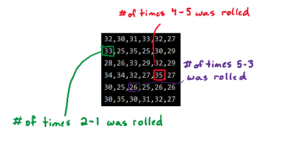


Complete the following tasks:

- Create a text file similar to the one above using a text editor.  You can put in your own numbers.

    - Bonus: Write a program that generates that random data for you.

- Read the data into a 2D list of integer values

- Find the maximum value in the list

- Write to a text file the combination of rolls that was rolled the most times.  If there is a tie, then write them all.

For example, in the data file that is shown above, the combinations below would have been written to the output file because the maximum value of 35 occurred when these dice combinations occured.

- 2-3
- 4-5 
- 6-2